In [1]:
import sys
sys.path.append('../')

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pandas import read_csv



from matplotlib.font_manager import fontManager, FontProperties

path = "../times_new_roman.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)

plt.style.use('seaborn-paper')
sns.set(font=prop.get_name(), style='whitegrid')

In [3]:

import pickle
import glob

def plot_multiple(score_list, labels, dot_types, key, title=None, as_svg=True, rbranch=None, st_idx=0):
    merged = {'itr': [], key: [], 'model_size': [], 'dataset': [], 'model_dot': []}
    for idx, score_dict in enumerate(score_list):
        iterations = [itr for itr in score_dict if itr >= st_idx]
        iterations.sort()
        for itr in iterations:
            score_list_curr = [np.mean(score_dict[itr])]
            merged['itr'] += [itr/1000]*len(score_list_curr)
            merged[key] += score_list_curr
            merged['model_size'] += [labels[idx]]*len(score_list_curr)
            merged['model_dot'] += [dot_types[idx]]*len(score_list_curr)
            merged['dataset'] += [labels[idx]]*len(score_list_curr)
        
    df = pd.DataFrame(merged)
    if labels == ['2 layers', '4 layers', '6 layers']:
        colors = ['darkblue', 'darkgreen', 'darkred'] 
    else:
        colors = ['darkblue']#, 'darkred', 'darkorange'] 


    obj = sns.lineplot(data=df, x="itr", y=key, hue='model_size')
    
    obj.lines[0].set_linestyle(dot_types[0])
    
    obj.set_xlabel('thousand steps', fontsize=35)
    obj.set_ylabel(key, fontsize=35)
    for label in (obj.get_xticklabels() + obj.get_yticklabels()):
        label.set_fontsize(25)    

    if rbranch is not None:
        obj.axhline(rbranch, ls='--', c='r')
    sns.despine()
    plt.setp(obj.get_legend().get_texts(), fontsize=25)
    obj.get_legend().set_title(None)
    
    plt.show()
    if title:
        obj.get_figure().savefig('figs/{}.ps'.format(title), bbox_inches="tight")
    



In [4]:
folder_names_6 = [
'lm_6layers_f_more_itrs_102_sci',
'lm_6layers_f_more_itrs_112_sci',
'lm_6layers_f_more_itrs_122_sci',
'lm_6layers_f_more_itrs_132_sci',
'lm_6layers_f_more_itrs_42_sci',
'lm_6layers_f_more_itrs_52_sci',
'lm_6layers_f_more_itrs_62_sci',
'lm_6layers_f_more_itrs_72_sci',
'lm_6layers_f_more_itrs_82_sci',
'lm_6layers_f_more_itrs_92_sci'
]

folder_names_4 = [
'lm_4layers_lm_102_sci',
'lm_4layers_lm_112_sci',
'lm_4layers_lm_122_sci',
'lm_4layers_lm_132_sci',
'lm_4layers_lm_42_sci',
'lm_4layers_lm_52_sci',
'lm_4layers_lm_62_sci',
'lm_4layers_lm_72_sci',
'lm_4layers_lm_82_sci',
'lm_4layers_lm_92_sci'
]

folder_names_2 = ['lm_2layers_lm_{}_sci'.format(idx) for idx in range(42, 142, 10)]
folder_names_8 = ['lm_8layers_lm_{}_sci'.format(idx) for idx in range(42, 142, 10)]
folder_names_10 = ['lm_10layers_lm_{}_sci'.format(idx) for idx in range(42, 142, 10)]





def get_data(folder_list, dat_csv):
    data = read_csv(dat_csv)
    all_losses = {}
    for folder_name in folder_list:
        key = folder_name[:-4]
        print(key)
        seed = key.split('_')[-1]
        dat_dict = data['{}-{} - loss'.format(key, seed)]
        loss_curr = {3*itr : dat_dict[itr] for itr, val in enumerate(dat_dict)}
        all_losses[folder_name] = loss_curr
    return all_losses


all_losses_10 = get_data(folder_names_10, '../train_loss_10layer_qf.csv')
all_losses_8 = get_data(folder_names_8, '../train_loss_8layer_qf.csv')
all_losses_6 = get_data(folder_names_6, '../train_loss_6layer_qf.csv')
all_losses_4 = get_data(folder_names_4, '../train_loss_4layer_qf.csv')
all_losses_2 = get_data(folder_names_2, '../train_loss_2layer_qf.csv')

lm_10layers_lm_42
lm_10layers_lm_52
lm_10layers_lm_62
lm_10layers_lm_72
lm_10layers_lm_82
lm_10layers_lm_92
lm_10layers_lm_102
lm_10layers_lm_112
lm_10layers_lm_122
lm_10layers_lm_132
lm_8layers_lm_42
lm_8layers_lm_52
lm_8layers_lm_62
lm_8layers_lm_72
lm_8layers_lm_82
lm_8layers_lm_92
lm_8layers_lm_102
lm_8layers_lm_112
lm_8layers_lm_122
lm_8layers_lm_132
lm_6layers_f_more_itrs_102
lm_6layers_f_more_itrs_112
lm_6layers_f_more_itrs_122
lm_6layers_f_more_itrs_132
lm_6layers_f_more_itrs_42
lm_6layers_f_more_itrs_52
lm_6layers_f_more_itrs_62
lm_6layers_f_more_itrs_72
lm_6layers_f_more_itrs_82
lm_6layers_f_more_itrs_92
lm_4layers_lm_102
lm_4layers_lm_112
lm_4layers_lm_122
lm_4layers_lm_132
lm_4layers_lm_42
lm_4layers_lm_52
lm_4layers_lm_62
lm_4layers_lm_72
lm_4layers_lm_82
lm_4layers_lm_92
lm_2layers_lm_42
lm_2layers_lm_52
lm_2layers_lm_62
lm_2layers_lm_72
lm_2layers_lm_82
lm_2layers_lm_92
lm_2layers_lm_102
lm_2layers_lm_112
lm_2layers_lm_122
lm_2layers_lm_132


In [5]:
import numpy as np
def get_mean_score(score_dict, normalize=False, ignore_first=False):
    mean_score = {}
    all_scores = [score_dict[key] for key in score_dict]
    for itr in all_scores[0]:
        if ignore_first and itr==3000:
            continue
        curr = []
        for score in all_scores:
            if itr in score and not np.isnan(score[itr]):
                curr.append(score[itr])
        if len(curr) > 0:
            mean_score[itr] = np.mean(curr)
        else:
            mean_score[itr] = 0.0
    if normalize:
        max_val = max([mean_score[key] for key in mean_score])
        return {key: s / max_val for key, s in mean_score.items()}
    else:
        return mean_score

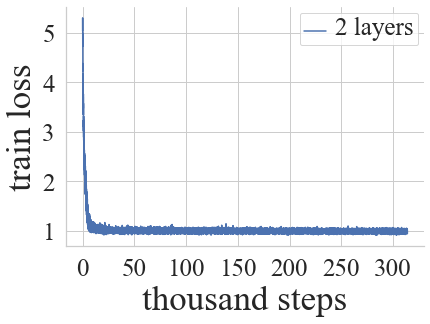

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


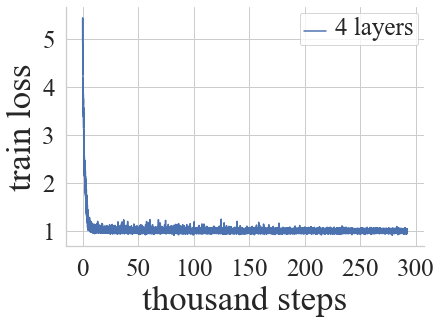

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


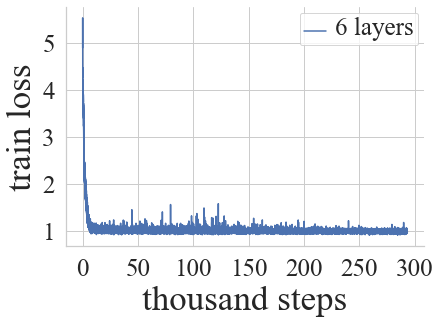

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


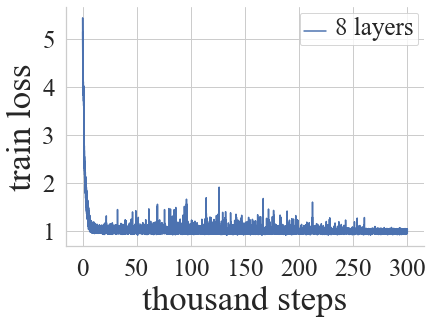

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


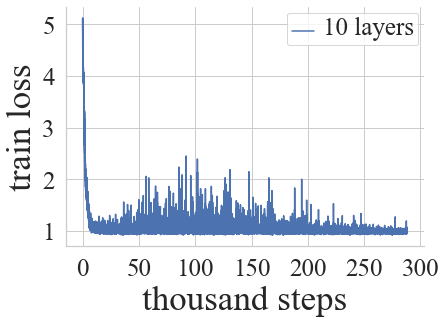

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
for layer, model_dict in zip([2, 4, 6, 8, 10], 
                             [all_losses_2, all_losses_4, all_losses_6, all_losses_8, all_losses_10]):
    plot_multiple([get_mean_score(model_dict)], ['{} layers'.format(layer)], ['-'], 'train loss', title='train_loss_{}'.format(layer))